In [1]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
import datetime
import category_encoders as ce
from sklearn.preprocessing import KBinsDiscretizer

# Import all data

In [2]:
#Load data

#Set parameter
dataset = 'test'

#Load data
df_ = pd.read_csv(os.path.join('data',dataset + ".csv"))
df = df_.copy()

df_kills = pd.read_csv(os.path.join('data','kills_columns_grouped.csv'), sep=',')
df_monsters = pd.read_csv(os.path.join('data','monsters_columns_grouped.csv'), sep=',')
df_towers = pd.read_csv(os.path.join('data','towers_columns_grouped.csv'), sep=',')
df_gold = pd.read_csv(os.path.join('data','gold_columns_grouped.csv'), sep=',')

In [3]:
df = pd.merge(df, df_kills,  on = 'game_id', how ='left')
df = df.merge(df_monsters,  on = 'game_id', how ='left')
df = df.merge(df_towers,  on = 'game_id', how ='left')
df = df.merge(df_gold,  on = 'game_id', how ='left')

In [4]:
#First look
display(df.head(5))
df.shape

,Year,Season,blueTeamTag,redTeamTag,gamelength,game_id,total_kills_b_team,total_kills_r_team,total_monsters_b,total_monsters_a,total_towers_b_team,total_towers_r_team,blue_gold,red_gold
0,2017,Spring,IMT,C9,34,9564c32b-dad9-4292-8efb-8fa41f026fe9,2.0,8.0,NaN,NaN,NaN,NaN,12900,15038
1,2017,Summer,SSG,EDG,46,8160b53f-417a-416c-bd66-41b115e91039,0.0,2.0,NaN,NaN,NaN,NaN,13025,13394
2,2017,Summer,JT,ahq,37,5bd6d56b-e337-4f61-83b6-cfe21a481892,0.0,1.0,NaN,NaN,NaN,NaN,13096,13643
3,2017,Spring,PNG,REM,57,614fd189-86c9-4f44-9b13-cf980e1ccc9f,2.0,0.0,NaN,NaN,NaN,NaN,13871,12650
4,2017,Spring,C9,DIG,46,539f6975-88f2-40ea-8d22-4b500370e971,1.0,5.0,1.0,0.0,0.0,1.0,12794,15678


(3552, 14)

In [5]:
#Drop unecessary columns
df = df.drop(['blueTeamTag','redTeamTag'],axis=1)

In [6]:
#Check data type
df.dtypes

Year                     int64
Season                  object
gamelength               int64
game_id                 object
total_kills_b_team     float64
total_kills_r_team     float64
total_monsters_b       float64
total_monsters_a       float64
total_towers_b_team    float64
total_towers_r_team    float64
blue_gold                int64
red_gold                 int64
dtype: object

In [7]:
#Find columns with nulls values
df.isna().sum()

Year                      0
Season                    0
gamelength                0
game_id                   0
total_kills_b_team      332
total_kills_r_team      332
total_monsters_b       2251
total_monsters_a       2251
total_towers_b_team    2382
total_towers_r_team    2382
blue_gold                 0
red_gold                  0
dtype: int64

In [8]:
#fill nulls
df['total_kills_b_team'] = df.total_kills_b_team.fillna(0)
df['total_kills_r_team'] = df.total_kills_b_team.fillna(0)
df['total_monsters_b'] = df.total_monsters_b.fillna(0)
df['total_monsters_a'] = df.total_monsters_a.fillna(0)
df['total_towers_b_team'] = df.total_towers_b_team.fillna(0)
df['total_towers_r_team'] = df.total_towers_r_team.fillna(0)

In [9]:
#Cehck columns with nulls values
df.isna().sum()

Year                   0
Season                 0
gamelength             0
game_id                0
total_kills_b_team     0
total_kills_r_team     0
total_monsters_b       0
total_monsters_a       0
total_towers_b_team    0
total_towers_r_team    0
blue_gold              0
red_gold               0
dtype: int64

<AxesSubplot:>

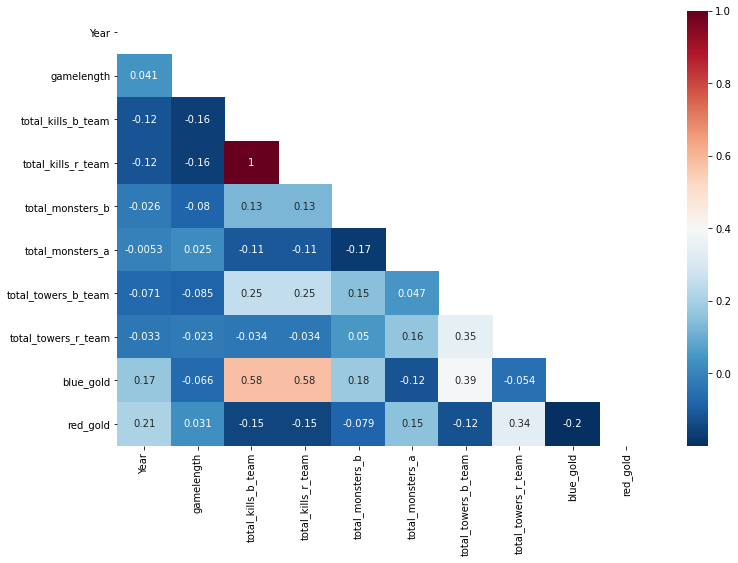

In [10]:
#check correlation
cor_df = df.corr()
lower_triangle_mask = np.triu(np.ones(cor_df.shape)).astype(np.bool)
cor_df_lower = cor_df.mask(lower_triangle_mask)
plt.figure(figsize = (12,8))
sns.heatmap(cor_df_lower, annot = True, cmap = "RdBu_r")

In [11]:
"""
#Check for unique values
categoricals = df.select_dtypes(include='object').columns

number_of_uniques_per_category = df.loc[:, categoricals].nunique()

# little plot 
number_of_uniques_per_category.plot(kind='barh',
                                    title='# uniques / categories');
plt.xlabel('Number of uniques')
plt.show()

number_of_uniques_per_category
"""

"\n#Check for unique values\ncategoricals = df.select_dtypes(include='object').columns\n\nnumber_of_uniques_per_category = df.loc[:, categoricals].nunique()\n\n# little plot \nnumber_of_uniques_per_category.plot(kind='barh',\n                                    title='# uniques / categories');\nplt.xlabel('Number of uniques')\nplt.show()\n\nnumber_of_uniques_per_category\n"

# Encoding

In [12]:
df.dtypes

Year                     int64
Season                  object
gamelength               int64
game_id                 object
total_kills_b_team     float64
total_kills_r_team     float64
total_monsters_b       float64
total_monsters_a       float64
total_towers_b_team    float64
total_towers_r_team    float64
blue_gold                int64
red_gold                 int64
dtype: object

In [13]:
#ENCODING VARIAVEIS CATEGORICAS

#Ordinal Encoder
for f in df.select_dtypes(include='object').columns:
    if f != 'game_id':
        encoder = ce.ordinal.OrdinalEncoder()

        X2 = df[[f]]
        encoder.fit(X2)

        df[f+'_Encode'] = encoder.transform(X2)
        df = df.drop(f,axis=1)


# Scalling numericals

In [14]:
numericals = df.select_dtypes(include=['int64','float64']).columns
df[numericals].describe()

,Year,gamelength,total_kills_b_team,total_kills_r_team,total_monsters_b,total_monsters_a,total_towers_b_team,total_towers_r_team,blue_gold,red_gold
count,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000
mean,2017.067849,36.445664,1.747185,1.747185,0.170045,0.211430,0.275619,0.207770,13455.478041,13335.715372
std,0.251522,7.921566,1.635202,1.635202,0.387532,0.415219,0.529918,0.474843,755.279926,721.387347
min,2017.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11476.000000,11222.000000
25%,2017.000000,31.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12925.000000,12838.000000
50%,2017.000000,35.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13356.500000,13258.000000
75%,2017.000000,41.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,13864.500000,13739.500000
max,2018.000000,95.000000,13.000000,13.000000,2.000000,2.000000,4.000000,4.000000,17036.000000,17104.000000


In [15]:
"""
##SCALE DE VARIAVEIS NUMERICAS

from sklearn.preprocessing import RobustScaler

#Features to scale

scale_list = ['ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER_FL_NUM']


for f in scale_list:
    # initialize transformer with desired options
    robustscaler = RobustScaler()

    # save data to scale
    X_rbs = df[[f]]

    # fit transformer to data
    robustscaler.fit(X_rbs)

    # create new feature by transforming the data
    col_new_name = f + '_robust_scaled'
    df[f] = robustscaler.transform(X_rbs)


#drop original columns
df.drop(scale_list, axis = 1)
df
"""

"\n##SCALE DE VARIAVEIS NUMERICAS\n\nfrom sklearn.preprocessing import RobustScaler\n\n#Features to scale\n\nscale_list = ['ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER_FL_NUM']\n\n\nfor f in scale_list:\n    # initialize transformer with desired options\n    robustscaler = RobustScaler()\n\n    # save data to scale\n    X_rbs = df[[f]]\n\n    # fit transformer to data\n    robustscaler.fit(X_rbs)\n\n    # create new feature by transforming the data\n    col_new_name = f + '_robust_scaled'\n    df[f] = robustscaler.transform(X_rbs)\n\n\n#drop original columns\ndf.drop(scale_list, axis = 1)\ndf\n"

In [16]:
df.to_csv('data/' + dataset + '_out.csv', index=False)